# Applying sentiment analysis to your social network

## Step 1: Extract Data

### Twitter

In [2]:
import tweepy
from tweepy import OAuthHandler
import xlsxwriter

import twitterCredentials

ImportError: No module named twitterCredentials

In [ ]:
api_key = twitterCredentials.api_key
api_secret = twitterCredentials.api_secret
access_token = twitterCredentials.access_token
access_secret = twitterCredentials.access_secret

auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
book = xlsxwriter.Workbook('Test1.xlsx')
sheet = book.add_worksheet('Data')
row = 0
col = 0
 
header = ["Date", "Day", "Tweet", "Retweets", "Likes"]
for title in header:
    sheet.write(row, col, title)
    col += 1
row = 1

In [ ]:
name = "cnnespan"

timeline = api.user_timeline(id=name, count=500 )

for tweet in timeline:
    print(tweet.text)
    data = [tweet.created_at.date().strftime("%b %d %Y "), tweet.created_at.date().strftime("%b %d"), tweet.text, tweet.retweet_count, tweet.favorite_count]
    col = 0
    
    for text in data:
        sheet.write(row, col, text)
        col += 1
    row += 1
    
book.close()

### Facebook

In [3]:
!pip3 install facebook-scraper
from facebook_scraper import get_posts
from textblob import TextBlob

    100% |████████████████████████████████| 1.2MB 717kB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7fb/requests-2.22.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 81kB 4.5MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/e8/74/6e4f91745020f967d09332bb2b8b9b10090957334692eb88ea4afe91b77f/urllib3-1.25.8-py2.py3-none-any.whl
    100% |████████████████████████████████| 61kB 4.7MB/s eta 0:00:01
    100% |████████████████████████████████| 112kB 4.2MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/b9/63/df50cac98ea0d5b006c55a399c3bf1db9da7b5a24de7890bc9cfd5dd9e99/certifi-2019.11.28-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/2c/cd551d81dbe15200be1cf41cd03869a

ImportError: No module named facebook_scraper

In [4]:
book = xlsxwriter.Workbook('test2.xlsx')
sheet = book.add_worksheet('djangogirlsData')
row = 0
col = 0
 
sheet.write(row, col, "Post")
row = 1

NameError: name 'xlsxwriter' is not defined

In [ ]:
for post in get_posts('djangogirlsbogota', pages=4):
    b = TextBlob(post['text'])
    
    if b.detect_language() == 'es':
        print(post['text'])
        sheet.write(row, 0, post['text'])
        row += 1
    
book.close()

## Step 2: Load Data

In [7]:
import pandas as pd

import nltk
nltk.download('punkt')
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

%matplotlib inline

ImportError: Missing required dependencies ['numpy']

In [9]:
nltk.download('stopwords')

NameError: name 'nltk' is not defined

In [10]:
datos_excel = pd.read_excel(open('facebookScraps.xlsx','rb'))
datos_excel = pd.DataFrame(datos_excel)
datos_excel.head()

NameError: name 'pd' is not defined

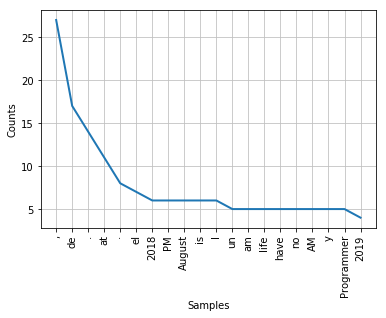

In [9]:
Post = ""
for data in datos_excel['Post']:
    Post += data
    
freq = FreqDist(word_tokenize(Post))
freq.plot(20)

In [16]:
print Post

Post


## Step 3: Clean Data

In [1]:
import emoji
import re

from nltk.corpus import stopwords
import string

In [2]:
stopwordList = stopwords.words("english")
stopwordList

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're",
 u"you've",
 u"you'll",
 u"you'd",
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u"she's",
 u'her',
 u'hers',
 u'herself',
 u'it',
 u"it's",
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u"that'll",
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'th

In [3]:
punctuationList = list(string.punctuation)
punctuationList

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [4]:
stopwordsList = stopwordList + punctuationList + ['“','”','¡','¿',"''",'``','...','→','⬥']
stopwordsList

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're",
 u"you've",
 u"you'll",
 u"you'd",
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u"she's",
 u'her',
 u'hers',
 u'herself',
 u'it',
 u"it's",
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u"that'll",
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'th

In [5]:
Post

NameError: name 'Post' is not defined

In [6]:
def clean_tweets_emoji(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    
    return clean_text

In [7]:
tweets_clean_emoji = clean_tweets_emoji(Post)
tweets_clean_emoji

NameError: name 'Post' is not defined

In [17]:
def clean_tweets_regex(text):
    tweet = re.sub(r'@[a-zA-Z0-9-_.]+', '', text)
    tweet = re.sub(r'#[a-zA-Z0-9-_.]+', '', tweet)
    tweet = re.sub(r'https://[a-zA-Z0-9-_./]+', '', tweet)
    tweet = re.sub(r'www.[a-zA-Z0-9-_./]+', '', tweet)
    tweet = re.sub(r'[a-zA-Z0-9-./]+[…]', '', tweet)
    tweet = re.sub(r'[ ]+[…]', '', tweet)
    tweet = re.sub('\n|\r', '', tweet)
    tweet = re.sub(r'[á|ä|â|à]', 'a', tweet)
    tweet = re.sub(r'[é|ê|è]', 'e', tweet)
    tweet = re.sub(r'[í|î|ì]', 'i', tweet)
    tweet = re.sub(r'[ó|ô|ò]', 'o', tweet)
    tweet = re.sub(r'[ú|û|ù|ü]', 'u', tweet)
    tweet = re.sub(r'RT ', '', tweet)
    return tweet

In [18]:
tweets_clean = clean_tweets_regex(tweets_clean_emoji)
tweets_clean

u'I am Programmer,I have no life. January 24 at 4:27 AM \xb7I am Programmer,I have no life. November 22, 2019 at 2:23 PM \xb7Security Partner August 1, 2019 at 4:44 PM \xb7 Nada del otro mundo jajaja Memes for Object-oriented Teens May 11, 2019 at 12:20 PM \xb7 Show me your big oI am Programmer,I have no life. April 5, 2019 at 12:00 AM \xb7ELTIEMPO.COM As\xed vive el gamer profesional m\xe1s exitoso de ColombiaMauricio Toro is feeling excited. September 14, 2018 at 6:07 PM \xb7 Estudiantes y recien egresados de Eafit, los invito a participar de esta capacitaci\xf3n y concurso de Inteligencia Artificial. Aqu\xed aprenderemos las bases y luego habr\xe1 un reto. aHabr\xe1n premios, sorpresas y comida gratis! aHabr\xe1n ofertas laborales en el extranjero! ...y mucho m\xe1sCompartiendo un momento con el creador de Coursera, Google Brain, AI Fund, Andrew NG. Mauricio Toro is feeling blessed. August 24, 2018 at 8:56 PM \xb7 Compartiendo un momento con el creador de Coursera, Google Brain, AI 

In [19]:
filtro = [palabra for palabra in word_tokenize(tweets_clean) if palabra not in stopwordsList]
filtro

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  """Entry point for launching an IPython kernel.


[u'I',
 u'Programmer',
 u'I',
 u'life',
 u'January',
 u'24',
 u'4:27',
 u'AM',
 u'\xb7I',
 u'Programmer',
 u'I',
 u'life',
 u'November',
 u'22',
 u'2019',
 u'2:23',
 u'PM',
 u'\xb7Security',
 u'Partner',
 u'August',
 u'1',
 u'2019',
 u'4:44',
 u'PM',
 u'\xb7',
 u'Nada',
 u'del',
 u'otro',
 u'mundo',
 u'jajaja',
 u'Memes',
 u'Object-oriented',
 u'Teens',
 u'May',
 u'11',
 u'2019',
 u'12:20',
 u'PM',
 u'\xb7',
 u'Show',
 u'big',
 u'oI',
 u'Programmer',
 u'I',
 u'life',
 u'April',
 u'5',
 u'2019',
 u'12:00',
 u'AM',
 u'\xb7ELTIEMPO.COM',
 u'As\xed',
 u'vive',
 u'el',
 u'gamer',
 u'profesional',
 u'm\xe1s',
 u'exitoso',
 u'de',
 u'ColombiaMauricio',
 u'Toro',
 u'feeling',
 u'excited',
 u'September',
 u'14',
 u'2018',
 u'6:07',
 u'PM',
 u'\xb7',
 u'Estudiantes',
 u'recien',
 u'egresados',
 u'de',
 u'Eafit',
 u'los',
 u'invito',
 u'participar',
 u'de',
 u'esta',
 u'capacitaci\xf3n',
 u'concurso',
 u'de',
 u'Inteligencia',
 u'Artificial',
 u'Aqu\xed',
 u'aprenderemos',
 u'las',
 u'bases',
 u'

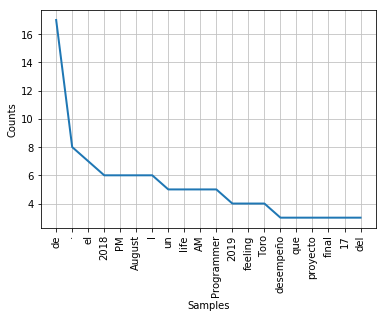

In [20]:
freq = FreqDist(filtro)
freq.plot(20)

## Step 4: Process Data

### Tweets en Español

In [10]:
import pandas as pd
from nltk.classify import NaiveBayesClassifier

ImportError: Missing required dependencies ['numpy']

In [8]:
datos_excel = pd.read_excel(open('taggedTweets.xlsx','rb'))
datos_excel = pd.DataFrame(datos_excel)
sample = datos_excel.sample(len(datos_excel))
sample

NameError: name 'pd' is not defined

In [23]:
def construirBolsaDePalabras(palabras):
    diccionario={}
    for palabra in word_tokenize(palabras):
        if palabra not in stopwordsList:
            diccionario[palabra]=1
    return diccionario

In [24]:
rasgosNegativos = []
rasgosPositivos = []
rasgosNeutrales = []
    
for indice_fila, fila in sample.iterrows():
    tweet_clean = clean_tweets_emoji(fila['Tweet'])
    tweet_clean = clean_tweets_regex(tweet_clean)
    if fila['Sentimiento'] == 'pos':
        rasgosPositivos.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))
    elif fila['Sentimiento'] == 'neu':
        rasgosNeutrales.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))
    else:
        rasgosNegativos.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


In [25]:
len(rasgosPositivos)

454

In [1]:
rasgosPositivos[5]

NameError: name 'rasgosNegativos' is not defined

In [27]:
divP=int(len(rasgosPositivos)*0.95)
divNeu=int(len(rasgosNeutrales)*0.95)
divNeg=int(len(rasgosNegativos)*0.95)
clasificadorSentimiento=NaiveBayesClassifier.train(rasgosPositivos[:divP]+rasgosNegativos[:divNeg]+rasgosNeutrales[:divNeu])

In [28]:
nltk.classify.util.accuracy(clasificadorSentimiento,rasgosPositivos[:divP]+rasgosNegativos[:divNeg]+rasgosNeutrales[:divNeu])

0.9551430781129157

In [29]:
nltk.classify.util.accuracy(clasificadorSentimiento,rasgosPositivos[divP:]+rasgosNegativos[divNeg:]+rasgosNeutrales[divNeu:])

0.6666666666666666

In [30]:
clasificadorSentimiento.show_most_informative_features()

Most Informative Features
                    UCLA = 1                 neg : neu    =     17.8 : 1.0
             Autoridades = 1                 neg : neu    =     17.0 : 1.0
                  invita = 1                 neu : neg    =     14.3 : 1.0
                      tu = 1                 pos : neg    =     10.3 : 1.0
                Ciencias = 1                 neg : neu    =     10.3 : 1.0
                  inicia = 1                 pos : neg    =     10.3 : 1.0
                    toda = 1                 neu : neg    =      9.7 : 1.0
                     han = 1                 neg : pos    =      9.7 : 1.0
                      te = 1                 pos : neg    =      9.4 : 1.0
               Venezuela = 1                 neg : pos    =      9.3 : 1.0


In [31]:
tweet = "¿El peor solo de guitarra de la historia? Burlas a Nick Jonas por su interpretación"

print(tweet)
tweet_clean = clean_tweets_emoji(tweet)
tweet_clean = clean_tweets_regex(tweet_clean)
bolsa=construirBolsaDePalabras(tweet_clean)
print(bolsa)

¿El peor solo de guitarra de la historia? Burlas a Nick Jonas por su interpretación
{'solo': 1, '\xc2\xbfEl': 1, 'peor': 1, 'la': 1, 'Burlas': 1, 'por': 1, 'de': 1, 'Nick': 1, 'su': 1, 'historia': 1, 'Jonas': 1, 'interpretaciaon': 1, 'guitarra': 1}


/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


In [32]:
clasificadorSentimiento.classify(bolsa)

u'neg'

In [33]:
datos_excel = pd.read_excel(open('test1.xlsx','rb'))
datos_excel = pd.DataFrame(datos_excel)
muestra = datos_excel.sample(len(datos_excel))
muestra

IOError: [Errno 2] No such file or directory: 'test1.xlsx'

In [ ]:
positive = []
neutral = []
negative = []

In [ ]:
libro = xlsxwriter.Workbook('test1Tag.xlsx')
hoja = libro.add_worksheet('Data')

data = ["Tweet","Sentimiento"]
row = 0
col = 0
 
for titulo in data:
    hoja.write(row, col, titulo)
    col += 1
row = 1
col = 0

for indice_fila, fila in muestra.iterrows():
    print(fila[2])
    tweet_clean = clean_tweets_emoji(fila[2])
    tweet_clean = clean_tweets_regex(tweet_clean)
    bolsa=construirBolsaDePalabras(tweet_clean)
    sent = clasificadorSentimiento.classify(bolsa)
    print("\033[0;31;40m "+sent+" \033[0m")
    hoja.write(indice_fila+row, 0, fila[2])
    hoja.write(indice_fila+row, 1, sent)
    if sent == 'pos':
        positive.append(fila[2])
    elif sent == 'neu':
        neutral.append(fila[2])
    else:
        negative.append(fila[2])
libro.close()

### Tweets in English

In [ ]:
from textblob import TextBlob 

In [ ]:
excel_data = pd.read_excel(open('test2.xlsx','rb'))
excel_data = pd.DataFrame(excel_data)

In [ ]:
popularity_list = []
num_list = []
num = 1

for tweet in excel_data['Post']:
    print(tweet)
    
    analysis = TextBlob(tweet)
    analysis = analysis.sentiment
    print(analysis)
    popularity = analysis.polarity
    popularity_list.append(popularity)
    num_list.append(num)
    num = num + 1

## Step 5: ShowData

### Texto en Español

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

NameError: name 'positive' is not defined

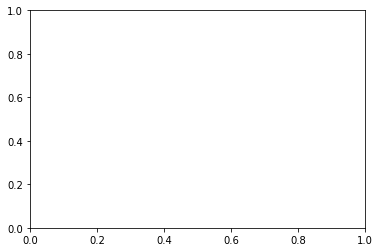

In [35]:
fig = plt.figure(u'Gráfica de barras')
ax = fig.add_subplot(111)

nombres = ['Positive','Neutral','Negative']
datos = [len(positive),len(neutral),len(negative)]
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(nombres)

plt.show()

### Text in English

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(num_list, popularity_list)
#plt.scatter(excel_data['Day'], popularity_list)
plt.title("Sentiments analysis to PyConCo2020")
plt.xlabel("Posts")
plt.ylabel("Sentiment")
plt.show()

### Bonus

In [ ]:
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(tweets_clean)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WWCode DataPY2019")
plt.show()